# Importar librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Cargar csv titanic

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')

# Exploración de datos

In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Análisis de datos

### cantidad de personas que sobrevivieron

In [8]:
sobrevivientes = df[df['Survived'] == 1]['Survived'].count()
print(f"Cantidad de personas que sobrevivieron: {sobrevivientes}")

Cantidad de personas que sobrevivieron: 342


### cantidad de personas que no sobrevivieron

In [9]:
no_sobrevivientes = df[df['Survived'] == 0]['Survived'].count()
print(f"Cantidad de personas que no sobrevivieron: {no_sobrevivientes}")

Cantidad de personas que no sobrevivieron: 549


### porcentaje de personas que no sobrevivieron

In [10]:
porcentaje_no_sobrevientes = (no_sobrevivientes / len(df)) * 100
print(f"Porcentaje de personas que no sobrevivieron: {porcentaje_no_sobrevientes:.2f}%")

Porcentaje de personas que no sobrevivieron: 61.62%


# Gráficas

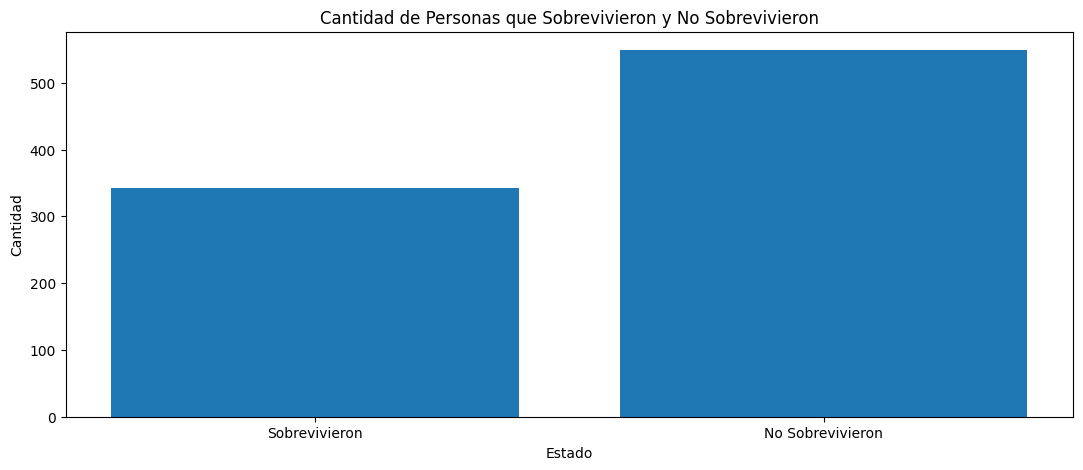

In [11]:
plt.figure(figsize=(13,5))
plt.bar(['Sobrevivieron', 'No Sobrevivieron'], [sobrevivientes, no_sobrevivientes])
plt.title('Cantidad de Personas que Sobrevivieron y No Sobrevivieron')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

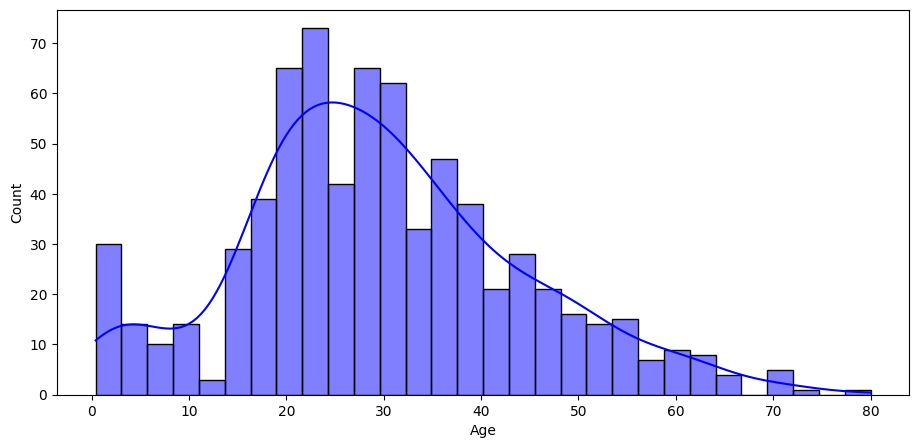

In [12]:
plt.figure(figsize=(11, 5))
sns.histplot(df['Age'].dropna(),kde=True,color='blue',bins=30)

# Valores faltantes

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Train - Test

### Variables categóricas

In [15]:
categoricas_cols = [col for col in df.columns if
                   df[col].nunique() < 10 and
                   df[col].dtype == 'object'
                   ]

### Variables numéricas

In [16]:
numericas_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

In [17]:
print(categoricas_cols)
print(numericas_cols)

['Sex', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [18]:
dummy = pd.get_dummies(df[categoricas_cols])
df = pd.concat([df, dummy], axis=1)
df = df.drop(['Sex'], axis = 1)
df = df.drop(['Embarked'], axis = 1)
df = df.drop(['Name'], axis = 1)
df = df.drop(['Cabin'], axis = 1)
df = df.drop(['Ticket'], axis = 1)

df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [19]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=2323)

final_test = test_data

train_data = train_data.drop(['PassengerId'], axis = 1)
test_data = test_data.drop(['PassengerId'], axis = 1)

print("Train:", len(train_data))
print("Test:", len(test_data))

Train: 712
Test: 179


In [20]:
X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']

X_test = test_data.drop(['Survived'], axis=1)
y_test = test_data['Survived']

# Correlación

In [21]:
correlacion = abs(pd.DataFrame(df.corr().Survived))
correlacion

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Age,0.069809
SibSp,0.035322
Parch,0.081629
Fare,0.257307
Sex_female,0.543351
Sex_male,0.543351
Embarked_C,0.168240


<Axes: >

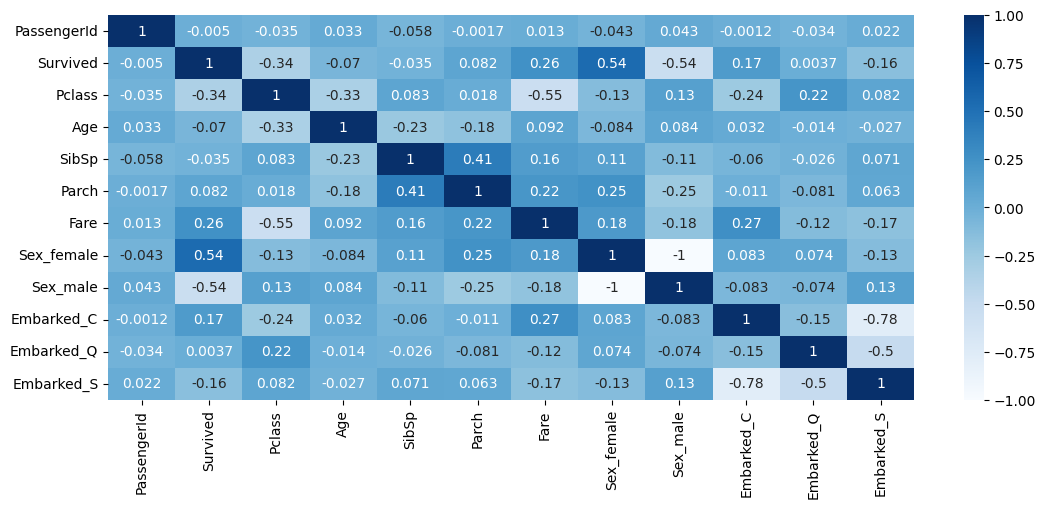

In [22]:
data_num_col = df.select_dtypes(exclude=['object']).columns
train_data_num = df[data_num_col]

plt.figure(figsize=(13, 5))
sns.heatmap(train_data_num.corr(), annot=True, cmap='Blues')

# Modelo regresión lineal

In [23]:
lr = LogisticRegression(random_state=2323)

In [24]:
lr.fit(X_train, y_train)

/Users/ana_m/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2323)

# Predicciones

In [25]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1])

# Desempeño del modelo

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8100558659217877


In [27]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.7571428571428571


In [28]:
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

Recall (Sensitivity): 0.7571428571428571


In [29]:
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.7571428571428571


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.76      0.76      0.76        70

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



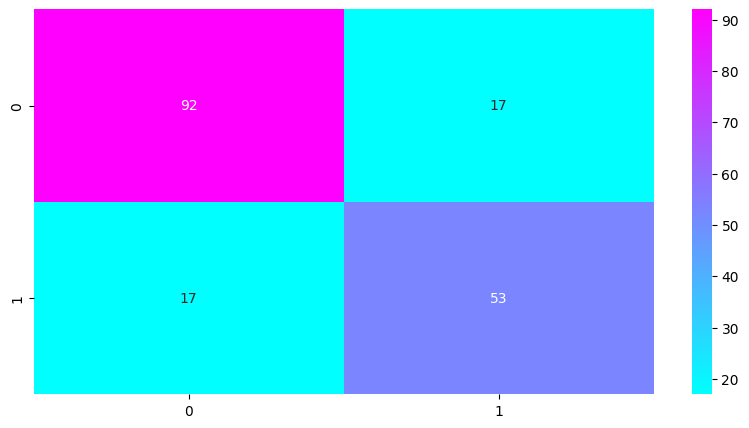

In [31]:
confusion_matrix = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='cool')
plt.show()